<!-- 
This Jupyter notebook is an almost-complete transcription of the article "Sentiment Analysis: First Steps With Python's NLTK Library" written by Marius Mogyorosi for RealPython. 

The article can be found at https://realpython.com/python-nltk-sentiment-analysis/ 


I have removed and/or altered some portions of the original article to better fit the context of a Jupyter notebook.
-->
# __Sentiment Analysis in Python using NLTK__

### <u>Introduction to NLTK</u>

NLTK (Natural Language ToolKit) is a Python library which contains a variety of utilities that allow you to effectively manipulate and analyze linguistic data. Among its advanced features are __text classifiers__ that you can use for many kinds of classification, including sentiment analysis.

__Sentiment analysis__ is the practice fo using algorithms to classify various samples of related text into overall positive and negative categories. With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data.

After using <code>pip</code> to install the <code>nltk</code> library, execute the following code to download the corpora used in this notebook.

> <u>__Note</u>:__
> The word __corpus__ and its plural form, __corpora__ refer to large collections of related text samples. In the context of NLTK, corpora are compiled with features for [natural language processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing), such as categories and numerical scores for particular features.

In [ ]:
import nltk

nltk.download([
   "names",
   "stopwords",
   "state_union",
   "twitter_samples",
   "movie_reviews",
   "averaged_perceptron_tagger",
   "vader_lexicon",
   "punkt",
])

The corpora being used in this notebook are:

- __names__: A [list of common English names](https://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/) compiled by Mark Kantrowitz
- __stopwords__: A list of really common words, like articles, pronouns, prepositions and conjunctions
- __state_union__: A sample of transcribed [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses by different US presidentsm compiled by Kathleen Ahrens
- __twitter_samples__: A list of social media phrases posted to Twitter
- __movie_reviews__: [Two thousand movie reviews](https://www.cs.cornell.edu/people/pabo/movie-review-data/) categorized by Bo Pang and Lillian Lee
- __averaged_perceptron_tagger__: A data model that NLTK uses to categorize words into their [part of speech](https://en.wikipedia.org/wiki/Part_of_speech)
- __vader_lexicon__: A scored [list of words and jargon](https://github.com/cjhutto/vaderSentiment) that NLTK references when performing sentiment analysis, created by C.J. Hutto and Eric Gilbert
- __punkt__: A data model created by Jan Strunk that NLTK uses to split full texts into word lists.

To view all of the available corpora and pre-trained models, run <code>nltk.download()</code>.

If NLTK requires resources that you have yet to install, you'll see a <code>LookupError</code> with details and instructions to download the resource:

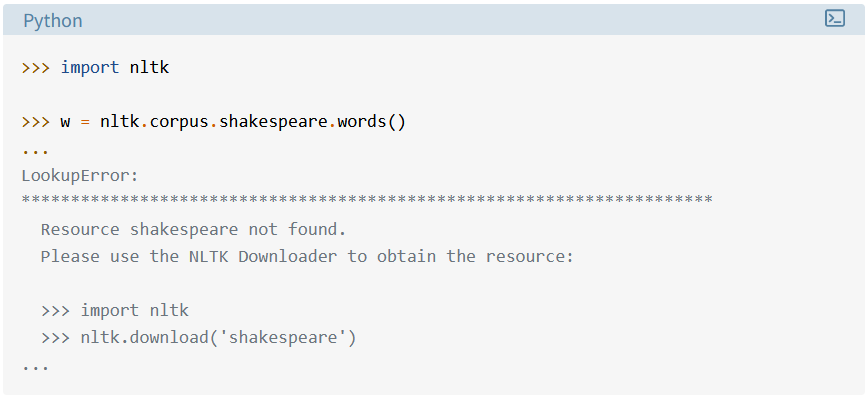



---
### <u>Compiling Data</u>

NLTK provides a number of functions that you can call with few or no arguments that will help you meaningfully analyze text before you even touch its machine learning capabilities. Many of NLTK's utilities are helpful in preparing your data for more advanced analysis.

Soon, you'll learn about frequency distributions, concordance, and collocations. But first, you need some data.

Start by loading the State of the Union corpus that was downloaded earlier:

In [ ]:
words = [word for word in nltk.corpus.state_union.words() if word.isalpha()]

# This is equivalent to:
# words = []
# for word in nltk.corpus.state_union.words():
#     if word.isalpha():
#         words.append(word)

Note that you build a list of individual words with the corpus's <code>.words()</code> method, but you use <code>str.isalpha()</code> to include only the words that are made up of letters. Otherwise, your words list may end up with "words" that are only punctuation marks.

Have a look at your list:

In [ ]:
from pprint import pprint   # pretty print

pprint(words[:25], compact=True)   # This is an extraordinarly long list, 
                                   # so we'll stick to 50 words here

You'll notice lots of little words like "of", "a", "the", and similar. These common words are called __stop words__, and they can have a negative effect on your analysis because they occur so often in the text. Thankfully, there's a convenient way to filter them out.

NLTK provides a small corpus of stop words that you can load into a list:

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

Make sure to specify <code>english</code> as the desired language since this corpus contains stop words in various languages.

Now, you can remove stop words from your original word list:

In [ ]:
words = [word for word in words if word.lower() not in stopwords]

pprint(words[:25], compact=True)

In [ ]:
# You can also remove stop words from the list on creation
words2 = [word for word in nltk.corpus.state_union.words() 
         if word.isalpha() and word.lower() not in stopwords]
print('\n')
pprint(words2[:25], compact=True)

print('\n', words == words2)

Since all words in the <code>stopwords</code> list are lowercase, and those in the original list may not be, you use <code>str.lower()</code> to account for any discrepancies. Otherwise, you may end up with mixedCase or capitalized stop words still in your list.

While the corpora used in this notebook are provided by NLTK, it's possible to build your own text corpora from any source. Building a corpus can be as simple as loading some plain text or as complex as labeling and categorizing each sentence. Refer to NLTK's documentation for more information on [how to work with corpus readers](https://www.nltk.org/howto/corpus.html).

For some quick analysis, creating a corpus could be overkill. If all you need is a word list, there are simpler ways to achieve this goal. Beyond Python's own string manipulation methods, NLTK provides <code>nltk.word_tokenize()</code>, a function that splits raw text into individual words. While __tokenization__ is itself a bigger topic (and likely one of the steps you'll take when creating a custom corpus), this tokenizer delivers simple word lists really well.

To use it, call <code>word_tokenize()</code> with the raw text you want to split:

In [ ]:
text = "For some quick analysis, creating a corpus could be overkill. If all you need is a word list, there are simpler ways to achieve this goal."

pprint(nltk.word_tokenize(text), compact=True)

Now you have a workable word list! Remember that punctuation will be counted as individual words, so use <code>str.isalpha()</code> to filter them out later.


---
### <u>Creating Frequency Distributions</u>

Now you're ready for __frequency distributions__. A frequency distribution is essentially a table that tells you how many times each word appears within a given text. In NLTK, frequency distributions are a specific object type implemented as a distinct class called <code>FreqDist</code>. This class provides useful operations for word frequency analysis.

To build a frequency distribution with NLTK, construct the <code>nltk.FreqDist</code> class with a word list:

In [ ]:
# Using the words list from above

fd = nltk.FreqDist(words)

This will create a frequency distribution object similar to a [Python dictionary](https://realpython.com/python-dicts/) but with added features.

After building the object, you can use methods list <code>.most_common()</code> and <code>.tabulate()</code> to start visualizing information:

In [ ]:
pprint(fd.most_common(8), compact=True)
print('\n')
fd.tabulate(8)

These methods allow you to quickly determine frequently used words in a sample. With <code>.most_common()</code>, you get a list of tuples containing each word and how many times it appears in your text. You can get the same information in a more readable form with <code>.tabulate()</code>.

In addition to these two methods, you can use frequency distributions to query particular words. You can also use them as iterators to perform some custom analysis on word properties.

For example, to discover differences in case, you can query for different variations of the same word:

In [ ]:
print(fd['America'])

print(fd['america'])   # Note this doesn't result in a KeyError

print(fd['AMERICA'])

These return values indicate the number of times each word occurs exactly as given.

Since frequency distribution objects are [iterable](https://realpython.com/python-for-loop/#iterables), you can use them within [list comprehenstions](https://realpython.com/list-comprehension-python/) to create subsets of the initial distribution. You can focus these subsets on properties that are useful for your own analysis.

Try creating a new frequency distribution that's based on the initial one but normalizes all words to lowercase:

In [ ]:
lower_fd = nltk.FreqDist([word.lower() for word in words])

lower_fd.tabulate(8)   # Note that some of the most common words have increased in frequency

Now you have a more accurate representation of word usage regardless of case.

NLTK provides many other ways to represent data from the frequency distribution:

In [ ]:
print(f'Unique words:\n {lower_fd.B()}')  # Number of unique words

print(f'Total words:\n {lower_fd.N()}')  # Total number of words

print(f'Fraction of words that are \'america\':\n {lower_fd.freq('america')}')  # Frequency (as a decimal) of a given word

lower_fd.plot(10)   # You may need to install the 'matplotlib' package first for this to work


---
### <u>Extracting Concordance and Collocations</u>

In the context of NLP, a __concordance__ is a collection of word locations along with their context. You can use concordances to find:
1. How many time a word appears
2. Where each occurrence appears
3. What words surround each occurrence

In NLTK, you can do this by calling <code>.concordance()</code>. To use it, you need an instance of the <code>nltk.Text</code> class, which can also be constructed with a word list.

Before invoking <code>.concordance()</code>, build a new word list from the original corpus text so that all the context, even stop words, will be there:

In [ ]:
text = nltk.Text(nltk.corpus.state_union.words())

text.concordance('america', lines=5)

Note that <code>.concordance()</code> already ignores case, allowing you to see the context of all case variants of a word in order of appearance. Note also that this function doesn't show you the location of each word in the text.

Additionally, since <code>.concordance()</code> only prints information to the console, it's not ideal for data manipulation. To obtain a usable list that will also give you information about the location of each occurrence, use <code>.concordance_list()</code>:

In [40]:
concordance_list = text.concordance_list('america')

for i in range(5):
    print(concordance_list[i].line)

print('\n')

# Alternatively,
concordance_list = text.concordance_list('america', lines=5)

for entry in concordance_list:
    print(entry.line)

 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace
beyond any shadow of a doubt , that America will continue the fight for freedom
 to make complete victory certain , America will never become a party to any pl
nly in law and in justice . Here in America , we have labored long and hard to 


 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace
beyond any shadow of a doubt , that America will continue the fight for freedom
 to make complete victory certain , America will never become a party to any pl
nly in law and in justice . Here in America , we have labored long and hard to 


<code>.concordance_list()</code> gives you a list of <code>ConcordanceLine</code> objects, which contain information about where each word occurs as well as a few more properties worth exploring. The list is also sorted in order of appearance.

The <code>nltk.Text</code> class itself has a few other interesting features. One of them is <code>.vocab()</code>, which is worth mentioning because it creates a frequency distribution for a given text.

Revisiting <code>nltk.word_tokenize()</code>, check out how quickly you can create a custom <code>nltk.Text</code> instance and an accompanying frequency distribution: